In [1]:
import numpy as np
from BPnumba.NumAG import createAG
from BPmodule.BPGen import PROBLEM2, PROBLEM3, PROBLEM4, PROBLEM5
from BPnumba.GeneticOperators import CreatePoblation, InstancePob,Hamming,SwapPointValue
from BPnumba.DFFA import createDFFA, BettaStep,AlphaStep
from BPnumba.ABCnum import createDABC
from numba import njit, objmode, prange
import time
from numba.typed import List as NumbaList
import matplotlib.pyplot as plt
from typing import List
from numpy import savetxt


In [2]:
P2A1 = PROBLEM2[0]
P2A2 = PROBLEM2[1]
P3A1 = PROBLEM3[0]
P3A2 = PROBLEM3[1]
P4A1 = PROBLEM4[0]
P4A2 = PROBLEM4[1]
P5A1 = PROBLEM5[0]
P5A2 = PROBLEM5[1]
pop=50
contenedor =P2A1[0][0]
datos = P2A1[1]
idBoxes = np.arange(1,len(datos)+1,dtype=np.int64)
initial = CreatePoblation(pop,idBoxes)
n= len(datos)
gamma= 1/n
maxItr=500
n

29

In [3]:
Pob = InstancePob(initial,datos,contenedor)

In [4]:
d1 = Pob[11]

d2 = Pob[0]
d1.fi,d1.genome,d2.fi,d2.genome

(0.4096,
 ListType[int64]([19, 25, 27, 22, 11, 16, 4, 15, 21, 8, 10, 17, 5, 9, 2, 23, 14, 3, 6, 1, 29, 28, 13, 20, 26, 18, 12, 24, 7, ...]),
 0.505792,
 ListType[int64]([12, 20, 10, 16, 15, 28, 19, 7, 13, 21, 1, 14, 11, 18, 8, 23, 2, 29, 3, 26, 9, 27, 22, 24, 25, 5, 17, 4, 6, ...]))

In [5]:
gamma= 1/(n*n)
dist = Hamming(d1.genome,d2.genome)
print(dist)
betta:float = 1/(1+gamma*dist*dist)
print(betta)
BettaStep(d2.genome,d1.genome,betta)
print(d2.genome)
print(Hamming(d2.genome,d1.genome))

28.0
0.5175384615384616
[19, 20, 10, 28, 11, 16, 4, 6, 22, 21, 25, 8, 5, 15, 2, 23, 14, 3, 29, 1, 9, 27, 13, 17, 26, 18, 12, 24, 7, ...]
13.0


In [6]:
dist = Hamming(d2.genome,d1.genome)
betta:float = 1/(1+gamma*dist*dist)
print(betta)
BettaStep(d2.genome,d1.genome,betta)
print(d2.genome)


0.8326732673267326
[19, 25, 27, 22, 11, 16, 4, 15, 17, 8, 10, 21, 5, 9, 2, 23, 14, 3, 6, 1, 29, 28, 13, 20, 26, 18, 12, 24, 7, ...]


0.10626992561105209


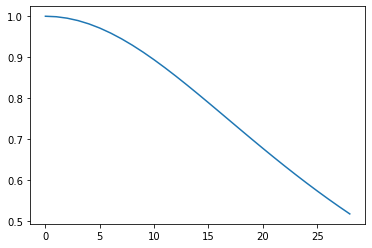

In [36]:
gamma= 1/(n*n)
x = np.arange(n)
Maxitr =500
cicle = np.arange(maxItr)
alpha = np.floor(n-1-((cicle)/Maxitr)*(n-1))
y= 1/(1+gamma*(x**2))
sim = np.power(1 - x/n,2)
beta =1/(1+gamma*x*x)
print(1-beta[10])
plt.figure()
plt.plot(x,beta)

plt.show()